In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
np.random.seed(42)

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r "gdrive/My Drive/Colab Notebooks/Xenete Fraud Detection/" sample_data/data

In [0]:
path_to_folder = 'sample_data/data/'

In [0]:
data = pd.read_csv(path_to_folder + 'training.csv')
test = pd.read_csv(path_to_folder + 'test.csv')

In [0]:
test = test.drop(['TransactionId','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId' , 'CountryCode' ,'CurrencyCode' , 'ProviderId' , 'ProductId' , 'ProductCategory' , 'ChannelId'  , 'PricingStrategy'], axis = 1)
data = data.drop(['TransactionId','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId' , 'CountryCode' ,'CurrencyCode' , 'ProviderId' , 'ProductId' , 'ProductCategory' , 'ChannelId'  , 'PricingStrategy'], axis = 1)

In [0]:
testm = pd.read_csv(path_to_folder + 'test.csv')

In [476]:
data.head()

,Amount,Value,TransactionStartTime,FraudResult
0,1000.0,1000,2018-11-15T02:18:49Z,0
1,-20.0,20,2018-11-15T02:19:08Z,0
2,500.0,500,2018-11-15T02:44:21Z,0
3,20000.0,21800,2018-11-15T03:32:55Z,0
4,-644.0,644,2018-11-15T03:34:21Z,0


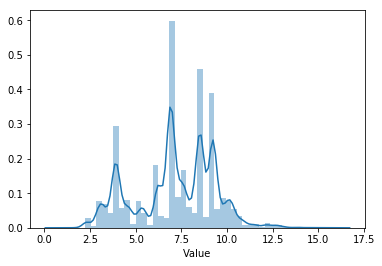

In [387]:
sns.distplot(testm.Value.transform(np.log))

In [0]:
data.Value = data.Value.transform(np.log)
test.Value = test.Value.transform(np.log)

In [0]:
row1 = {'ChannelId':'ChannelId_4'	, 'ProviderId':'ProviderId_4', 'ProductId':'ProductId_17', 'ProductCategory': 'airtime', 'Amount' : 22,
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'FraudResult' : 0 , 'PricingStrategy': 2}
row2 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_18', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row3 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_25', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row4 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_26', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2, 'FraudResult' : 0}
row5 = {'ProviderId':'ProviderId_4', 'ProductId':'ProductId_12', 'ProductCategory': 'airtime', 'ChannelId':'ChannelId_4'	, 'Amount':97, 
           'Value': 22, 'TransactionStartTime':'2018-11-15T02:18:49Z', 'PricingStrategy': 2}
#append row to the dataframe
data = data.append(row1, ignore_index=True)
data = data.append(row2, ignore_index=True)
data = data.append(row3, ignore_index=True)
data = data.append(row4, ignore_index=True)
test = test.append(row5, ignore_index=True)

In [218]:
test.shape , data.shape

((45020, 9), (95666, 10))

In [0]:
time = data.TransactionStartTime
timet = test.TransactionStartTime

In [0]:
time = pd.to_datetime(time)
timet = pd.to_datetime(timet)

In [0]:
data["hour"] = time.dt.hour
data["minute"] = time.dt.minute
data["month"] = time.dt.month
data["day"] = time.dt.day

test["hour"] = timet.dt.hour
test["minute"] = timet.dt.minute
test["month"] = timet.dt.month
test["day"] = timet.dt.day

In [0]:
data = data.drop(['TransactionStartTime'], axis = 1)
test = test.drop(['TransactionStartTime'], axis = 1)
#data['PricingStrategy'] = 'Pricing_' + data['PricingStrategy'].astype(str)

In [0]:
'''data['ProviderId'] = data['ProviderId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['ProductId'] = data['ProductId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['ChannelId'] = data['ChannelId'].str.split("_", n = 2, expand = True)[1].astype(int)
data['PricingStrategy'] = 'Pricing_' + data['PricingStrategy'].astype(str)

test['ProviderId'] = test['ProviderId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['ProductId'] = test['ProductId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['ChannelId'] = test['ChannelId'].str.split("_", n = 2, expand = True)[1].astype(int)
test['PricingStrategy'] = 'Pricing_' + test['PricingStrategy'].astype(str)'''

'data[\'ProviderId\'] = data[\'ProviderId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'ProductId\'] = data[\'ProductId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'ChannelId\'] = data[\'ChannelId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ndata[\'PricingStrategy\'] = \'Pricing_\' + data[\'PricingStrategy\'].astype(str)\n\ntest[\'ProviderId\'] = test[\'ProviderId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'ProductId\'] = test[\'ProductId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'ChannelId\'] = test[\'ChannelId\'].str.split("_", n = 2, expand = True)[1].astype(int)\ntest[\'PricingStrategy\'] = \'Pricing_\' + test[\'PricingStrategy\'].astype(str)'

In [0]:
data = pd.get_dummies(data, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 7 columns):
Amount         95662 non-null float64
Value          95662 non-null int64
FraudResult    95662 non-null int64
hour           95662 non-null int64
minute         95662 non-null int64
month          95662 non-null int64
day            95662 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.1 MB


In [0]:
X = data.drop(['FraudResult'] ,axis = 1)
y = data['FraudResult']

In [389]:
test.head()

,Amount,Value
0,1000.0,6.907755
1,2000.0,7.600902
2,-50.0,3.912023
3,3000.0,8.006368
4,-60.0,4.094345


In [227]:
test.shape , X.shape

((45020, 48), (95666, 48))

In [0]:
Xa = X.drop('Amount' , axis = 1)

In [495]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores.astype(int)],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))

    Specs        Score
1   Value  47044803271
0  Amount           44
5     day           36
4   month           31
2    hour           12


In [0]:
X_new = X.drop(['ProductId_ProductId_10', 'ProductId_ProductId_3', 'ProductCategory_ticket','ProductCategory_data_bundles', 'ProductCategory_movies' , 'ProductId_ProductId_21' ,'ProviderId_ProviderId_2','ChannelId_ChannelId_4','ProductCategory_other','ProductCategory_tv','ChannelId_ChannelId_5', 'ProductId_ProductId_24', 'ProductId_ProductId_20','ProductId_ProductId_25','ProductId_ProductId_26','ProductId_ProductId_27',
               'ProductId_ProductId_2', 'ProductId_ProductId_18','minute','hour' ,'ProductId_ProductId_7', 'ProductId_ProductId_8','ProductId_ProductId_17', 'ProductId_ProductId_23',
               'ProductId_ProductId_16','ProductId_ProductId_12','ProductId_ProductId_12','ProductId_ProductId_14','ProductId_ProductId_19', 'ProductId_ProductId_11',
               'ProductId_ProductId_4','ProductId_ProductId_22','ProductCategory_utility_bill'] , axis = 1)

test = test.drop(['ProductId_ProductId_10', 'ProductId_ProductId_3', 'ProductCategory_ticket','ProductCategory_data_bundles', 'ProductCategory_movies' , 'ProductId_ProductId_21' ,'ProviderId_ProviderId_2','ChannelId_ChannelId_4','ProductCategory_retail','ProductCategory_tv','ChannelId_ChannelId_5', 'ProductId_ProductId_24', 'ProductId_ProductId_20','ProductId_ProductId_25','ProductId_ProductId_26','ProductId_ProductId_27',
               'ProductId_ProductId_2', 'ProductId_ProductId_18','minute','hour' ,'ProductId_ProductId_7', 'ProductId_ProductId_8','ProductId_ProductId_17', 'ProductId_ProductId_23',
               'ProductId_ProductId_16','ProductId_ProductId_12','ProductId_ProductId_12','ProductId_ProductId_14','ProductId_ProductId_19', 'ProductId_ProductId_11',
               'ProductId_ProductId_4','ProductId_ProductId_22','ProductCategory_utility_bill'] , axis = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00086409 0.78052702 0.05674819 0.073277   0.01379478 0.07478892]


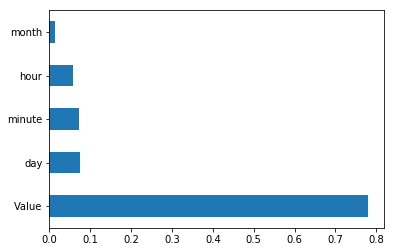

In [496]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [341]:
X_new.isnull().sum()

Value                                 0
month                                 0
day                                   0
ProviderId_ProviderId_3               0
ProviderId_ProviderId_4               0
ProviderId_ProviderId_5               0
ProviderId_ProviderId_6               0
ProductId_ProductId_13                0
ProductId_ProductId_15                0
ProductId_ProductId_5                 0
ProductId_ProductId_6                 0
ProductId_ProductId_9                 0
ProductCategory_financial_services    0
ProductCategory_transport             0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0
Sign                                  0
dtype: int64

In [0]:
X['Amount'] = pd.Series(np.where(X.Amount.values > 0 , 1 , 0))
test['Amount'] = pd.Series(np.where(test.Amount.values > 0 , 1 , 0))

In [0]:
data.head()

# Dimentionality Reduction

In [0]:
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA, FastICA

X = data.iloc[:, data.columns != 'FraudResult']
y = data.iloc[:, data.columns == 'FraudResult']

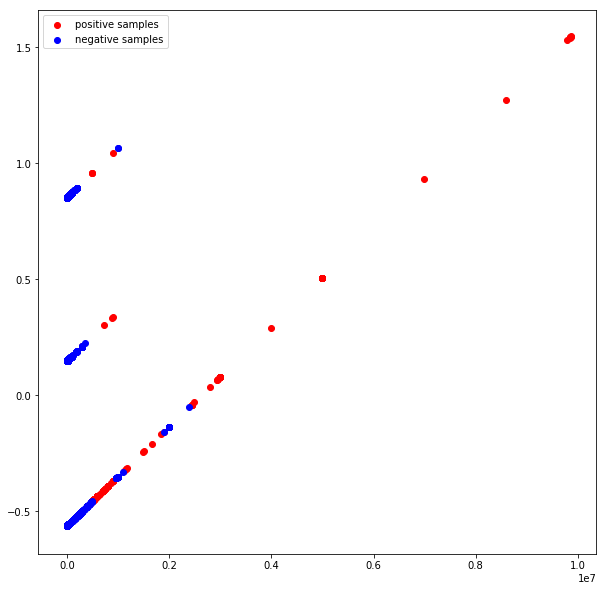

In [0]:
pca_embedding =  PCA(n_components=2) 
pca_emb_data = pca_embedding.fit_transform(X.values)
plt.figure(figsize=(10,10))
plt.scatter(pca_emb_data[y.values.ravel() == 1, 0], pca_emb_data[y.values.ravel() == 1, 1], color='red', label='positive samples')
plt.scatter(pca_emb_data[y.values.ravel() == 0, 0], pca_emb_data[y.values.ravel() == 0, 1], color='blue', label='negative samples')
plt.legend()

In [0]:
kpca_embedding =  KernelPCA(n_components=2, kernel='rbf')
kpca_emb_data = kpca_embedding.fit_transform(X.values)
plt.figure(figsize=(10,10))
plt.title('Reduced data with kernel PCA (RBF kernel)')
plt.scatter(pca_emb_data[y.values.ravel() == 1, 0], pca_emb_data[y.values.ravel() == 1, 1], color='red', label='positive samples')
plt.scatter(pca_emb_data[y.values.ravel() == 0, 0], pca_emb_data[y.values.ravel() == 0, 1], color='blue', label='negative samples')
plt.legend()

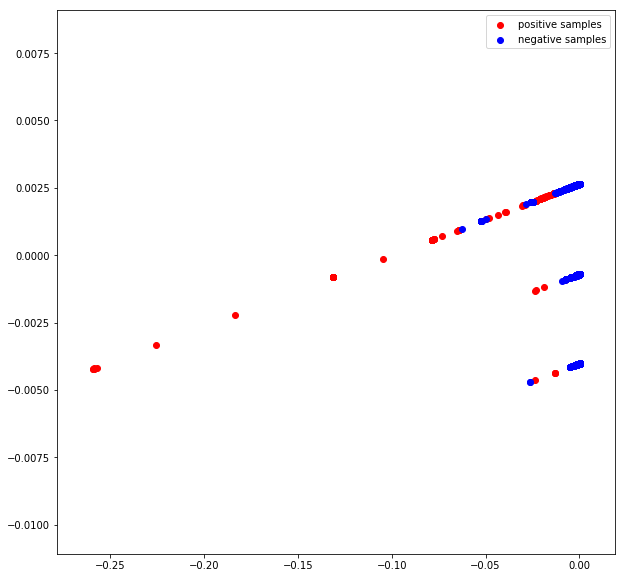

In [0]:
ica_embedding =  FastICA(n_components=2) 
ica_emb_data = ica_embedding.fit_transform(X.values)
plt.figure(figsize=(10,10))
plt.scatter(ica_emb_data[y.values.ravel() == 1, 0], ica_emb_data[y.values.ravel() == 1, 1], color='red', label='positive samples')
plt.scatter(ica_emb_data[y.values.ravel() == 0, 0], ica_emb_data[y.values.ravel() == 0, 1], color='blue', label='negative samples')
plt.legend()

In [0]:
tsne_embedding =  TSNE(n_components=2) 
tsne_emb_data = tsne_embedding.fit_transform(X.values)
plt.figure(figsize=(10,10))
plt.title('Reduced data with tSNE')
plt.scatter(tsne_emb_data[y.values.ravel() == 1, 0], tsne_emb_data[y.values.ravel() == 1, 1], color='red', label='positive samples')
plt.scatter(tsne_emb_data[y.values.ravel() == 0, 0], tsne_emb_data[y.values.ravel() == 0, 1], color='blue', label='negative samples')
plt.legend()

# Model Building

In [523]:
from imblearn.combine import SMOTETomek

rus = SMOTETomek(ratio='auto')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
X = data.iloc[:, data.columns != 'FraudResult']
y = data.iloc[:, data.columns == 'FraudResult']

In [0]:
sum(y['FraudResult'] == 1)

193

In [0]:
from sklearn.preprocessing import StandardScaler

month =  StandardScaler()
day =  StandardScaler()
X_new['day'] = day.fit_transform(X_new['day'].values.reshape(-1, 1))
X_new['month'] = month.fit_transform(X_new['month'].values.reshape(-1, 1))

In [0]:
#test['Amount'] = amount.transform(test['Amount'].values.reshape(-1, 1))
test['Value'] = hour.transform(test['Value'].values.reshape(-1, 1))
#test['hour'] = value.transform(test['hour'].values.reshape(-1, 1))

In [406]:
data.head()

,Amount,Value,FraudResult
0,1000.0,6.907755,0
1,-20.0,2.995732,0
2,500.0,6.214608,0
3,20000.0,9.989665,0
4,-644.0,6.467699,0


In [0]:
'''X = X.drop('hour', axis = 1)
test = test.drop('hour', axis = 1)'''

"X = X.drop('hour', axis = 1)\ntest = test.drop('hour', axis = 1)"

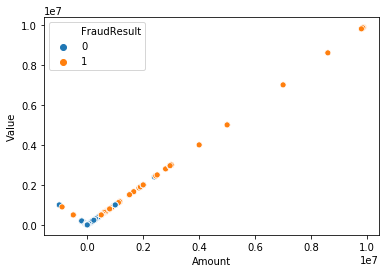

In [434]:
sns.scatterplot(x ='Amount' , y ='Value' , hue = 'FraudResult' , data = data)

In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [398]:
x_train.shape

(66963, 2)

In [0]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)

In [0]:
# making evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

In [498]:
# building first model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)
clf_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The Scores for LogisticRegression are: Accuracy of 0.9981880901773581, F1 of 0.48 and CM


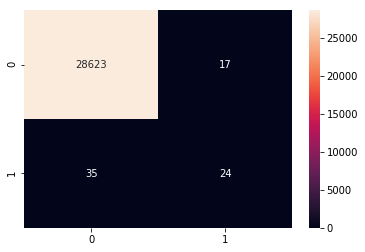

In [499]:
evaluate(clf_lr)

In [500]:
from sklearn.svm import SVC
clf_svm2 = SVC(gamma='auto', kernel = 'rbf')
clf_svm2.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The Scores for SVC are: Accuracy of 0.9980487124986933, F1 of 0.0967741935483871 and CM


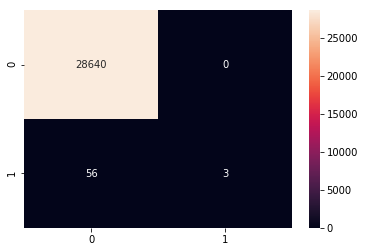

In [501]:
evaluate(clf_svm2)

In [502]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(8, n_jobs = -1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

The Scores for KNeighborsClassifier are: Accuracy of 0.9995121781246733, F1 of 0.8727272727272728 and CM


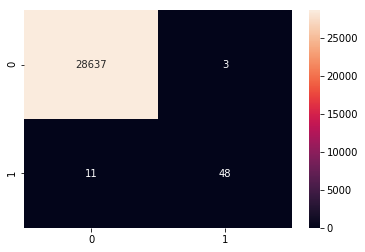

In [503]:
evaluate(clf_knn)

In [504]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.9996515558033381, F1 of 0.9166666666666666 and CM


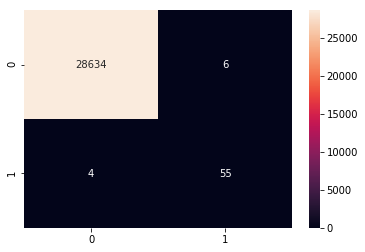

In [505]:
evaluate(clf_dt)

In [0]:
cw = {0 : 0.4 , 1 : 0.7}


In [506]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.9997909334820029, F1 of 0.9482758620689654 and CM


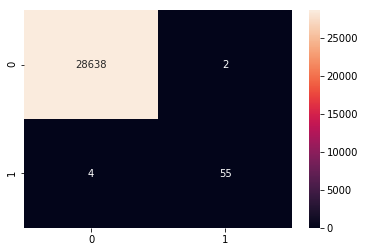

In [507]:
evaluate(clf_rf)

In [508]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

The Scores for XGBClassifier are: Accuracy of 0.9996864002230043, F1 of 0.9203539823008849 and CM


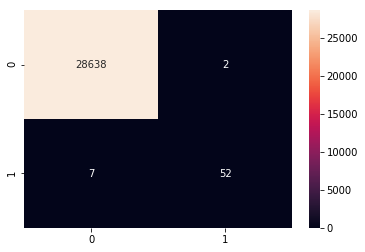

In [509]:
evaluate(clf_xgb)

In [510]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [511]:
model = Sequential([
    Dense(units=128, input_dim = x_train.shape[1],activation='relu'),
    Dense(units=128,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid'),
])
model.summary()

W0813 15:05:48.129824 140486145185664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 15:05:48.179593 140486145185664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 15:05:48.190346 140486145185664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 15:05:48.222317 140486145185664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 15:05:48.231421 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [512]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced' ,np.unique(y_train) ,y_train.values.ravel())
class_weights

array([  0.50100256, 249.8619403 ])

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,batch_size=1024,epochs=100)

The Scores for DNN are: Accuracy of 0.9978396459806962, F1 of 0.0 and CM


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


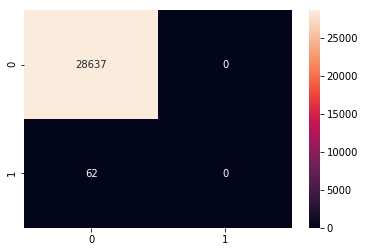

In [0]:
y_pred = np.round(model.predict(x_test))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format("DNN", accuracy, f1))
sns.heatmap(cm, annot = True , fmt='g')

# Submission

In [0]:
testData = pd.read_csv(path_to_folder+'test.csv')

In [516]:
test.head()

,Amount,Value,hour,minute,month,day
0,1,1000,10,1,2,13
1,1,2000,10,2,2,13
2,0,50,10,2,2,13
3,1,3000,10,2,2,13
4,0,60,10,2,2,13


In [0]:
ids = testData.TransactionId
prediction = clf_dt.predict(test)
all_data = list(zip(ids, prediction.reshape(1,-1)[0].astype('int32')))

In [0]:
d = pd.DataFrame(test).fillna(0)

In [522]:
final_result = pd.DataFrame(all_data, columns=['TransactionId', 'FraudResult'])
final_result.to_csv('final_dtt.csv', index =False)
final_result.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0
